 이 노트북은 [블로그](https://suy379.tistory.com/148)를 필사한 것입니다.   
공부 이외의 목적은 없습니다.



# [시각화] 파이썬 그래프 위에 글자 쓰기 (ax.patches, ax.text)

파이썬 그래프를 그렸는데, 바로 밑의 그림처럼 __그래프 위에 비율까지 쓰고 싶은 경우가__ 있을 것이다.  
이럴 때 사용하면 유용한 파이썬 __seaborn__ 에서 제공하는 ax.patches, ax.text 메서드를 활용하면 손쉽게 그릴 수 있다.  
<figure align="center">
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdMkMEb%2FbtrGPANfSif%2FxGqkwL80d6QP3yLgKhc7Y0%2Fimg.png">
    <figcaption style="margin-left: 13.5rem;"><b>오늘 만들어볼 결과물</b></figcaption>
</figure>

먼저 데이터셋은 __[캐글 Categorical Feature Encoding Challenge](https://www.kaggle.com/competitions/cat-in-the-dat/overview)__ 에서 제공하는 'train.csv'파일을 활용하였다.  
NOTE: 코드는 __[블로그 저자의 깃허브](https://github.com/suy379/python_for_DA)__ 에서 내려받을 수 있습니다!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('data/CFEC_train.csv', index_col='id')
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


먼저 데이터셋을 불러왔다. 오늘 활용할 변수는 __'nom_1'__ 이라는 범주형 변수이다.  
이 변수는 6개의 도형 값을 갖는 __범주형 변수이므로, 분포 파악을 위해 seaborn의 countplot을__ 활용하였다.

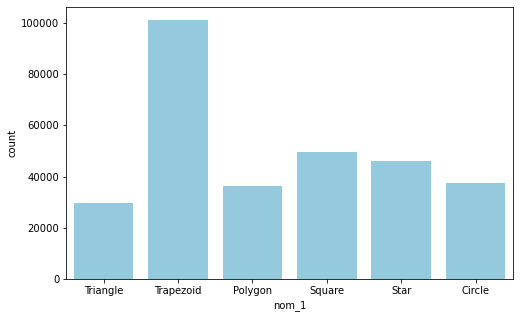

In [3]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='nom_1', data=df, color='skyblue') # 도수분포표를 그리는 함수
plt.show()

y축인 count는 개수를 의미한다.  
그래서 Trapezoid가 가장 많은 건 알겠고, 약 10만개인 것도 알겠는데.. 뭔가 좀 심심하다.  
<span style="background-color: #F6E199; color: #555555;"><b>Trapezoid가 nom_1이라는 변수내에서 차지하는 비율이 몇 %인지</b></span>가 궁금하다!

In [6]:
ax.patches

<Axes.ArtistList of 6 patches>

먼저 <span style="color:#EF5369;">ax 객체의 patches</span>를 뽑아본다.  
나온 값은 위 그래프의 6개의 바(bar) 각각을 의미한다. 즉, ax.patches[0]는 가장 왼쪽 값, Triangle의 bar를 의미한다.

먼저 Triangle 위에 비율을 써보겠다.  
Triangle을 나타내는 bar를 rec라는 객체로 따로 저장하고, height(세로길이), width(가로길이), get_x(왼쪽 테두리 x축) 값을 뽑아보자.

In [7]:
# 여기서 가장 왼쪽 bar의 값(Triangle)에 대해서만 먼저 해보자!
rec = ax.patches[0] 

# 각각 왼쪽 bar의 높이(개수), 가로길이, 왼쪽 테두리의 x축
print(rec.get_height(), rec.get_width(), rec.get_x())

29855 0.8 -0.4


이를 그림으로 나타내면 다음과 같다.  
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyJ1lO%2FbtrGPIYx1a3%2F2UuhP7MAKnpwoTKfSWqJOk%2Fimg.png)

우리는 rec 객체의 가장 위쪽 부분에 비율을 써줄 것이므로, 이렇게 구한 숫자값들을 활용해 <span style="background-color: #F6E199; color: #555555;"><b>비율을 써줄 위치의 x좌표, y좌표를</b></span> 구할 것이다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FJG3je%2FbtrGPofhUVC%2F7Ub1bIaUMI0Itz2c6wH3YK%2Fimg.png)

그럼 x좌표와 y좌표 값은 어떻게 구할 수 있을까?  

+ x좌표: bar의 가장 정 가운데 x좌표를 구해야 한다. 그러므로 get_x값에 , get_width의 절반을 더하자.
+ y좌표: bar의 세로길이로 지정해도 되지만, 그렇게 하면 bar에 너무 밀착되어 텍스트가 쓰여지므로 get_height에 일정 높이를 더해준다. 여기선 데이터프레임의 전체 데이터수에 0.01을 곱한 값을 썻다.

마지막으로 __Triangle의 비율__ 은 get_height가 세로길이이자 Triangle의 개수와 같으므로, 이 값을 전체 데이터 수에 대해 나누면 된다.

In [8]:
# 비율을 써줄 텍스트는 왼쪽 bar의 바로 위에 써줄 것이다.
# Triangle 뽑기

left_square = df['nom_1'].unique()[0]

print('x좌표: ', rec.get_x() + rec.get_width()/2)
print('y좌표: ', rec.get_height() + len(df) * 0.01)
print(f'{left_square}의 비율: ', (rec.get_height()/len(df))*100, '%')

x좌표:  0.0
y좌표:  32855.0
Triangle의 비율:  9.951666666666666 %


이렇게 해서 비율을 써줄 x, y좌표는 (x, y) = (0, 32855) 이고, 비율 값은 약 10%이다.  
구한 값을 그대로 그래프에 써주자.

+ ax.text 옵션
    + x: x좌표
    + y: y좌표
    + s: 텍스트로 쓰고자하는 내용
    + ha: 데이터 수평 정렬(horizontal alginment)

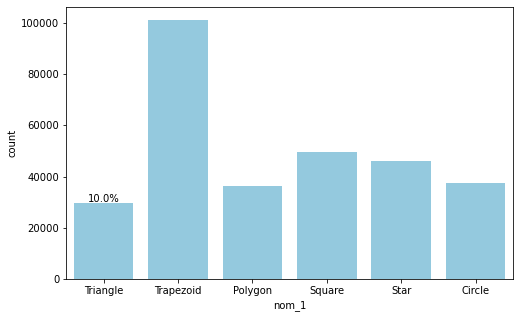

In [9]:
# 적용
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data=df, color='skyblue')
ax.text(x = rec.get_x() + rec.get_width()/2,
        y = rec.get_height() + len(df)*0.001,
        s = f'{rec.get_height()/len(df)*100:1.1f}%',
        ha = 'center')

plt.rc('font', size=11)
plt.show()

이렇게 10%라는 값이 나왔다.
참고로 s에 써준 텍스트에 1.1f를 썻는데, 이는 소수점 1자리수까지만 보여주게 된다.

나머지 Trapezoid ~ Circle에 대해서도 비율값을 써주자. <span style="color:#EF5369;">앞에서  ax.patches가 6개 Bar의 값을 갖고 있었으므로 for문으로 연결</span>해주면 되겠지?

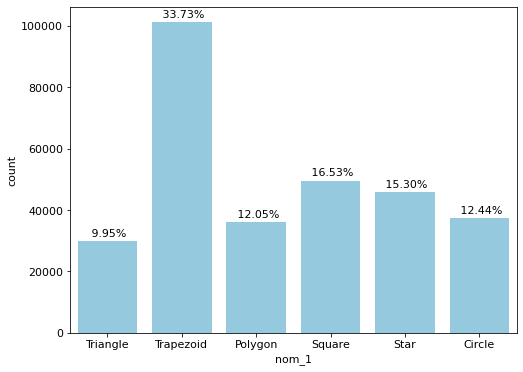

In [14]:
# for문으로 연결해서 모든 nom_1의 고유값에도 비율을 써보자

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'nom_1', data=df, color='skyblue')

for patch in ax.patches:
    # 2개의 patch 값을 가짐
    ax.text(x=patch.get_x() + patch.get_width()/2,
            y=patch.get_height() +len(df)*0.005,
            s=f'{(patch.get_height()/len(df))*100: 1.2f}%', 
            ha='center')

plt.rc('font', size=11)
plt.show()


완성!